In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

In [2]:
tech_list = ['TSM','NVDA' , 'AAPL', 'HNHPF']

In [5]:
end = datetime(2024,8,30)

start = datetime(end.year - 1, end.month, end.day)#一年前的同一天

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
globals()['TSM'].columns

MultiIndex([('Adj Close', 'TSM'),
            (    'Close', 'TSM'),
            (     'High', 'TSM'),
            (      'Low', 'TSM'),
            (     'Open', 'TSM'),
            (   'Volume', 'TSM')],
           names=['Price', 'Ticker'])

In [7]:
company_list = [TSM, NVDA, AAPL, HNHPF] #是全部資料dataframe組成的list
company_name = ["TSMC", "NVIDIA", "APPLE", "HONHAI"]
list=[]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    company.columns=company.columns.get_level_values(0)#刪掉Ticker，才能合併多公司
df = pd.concat(company_list, axis=0)
df

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Date,,,,,,,
2023-08-30,92.832199,94.779999,95.919998,94.629997,95.449997,6073400,TSMC
2023-08-31,91.647072,93.570000,94.400002,93.269997,93.339996,8661200,TSMC
2023-09-01,91.274879,93.190002,94.580002,93.089996,94.300003,7089900,TSMC
2023-09-05,92.655891,94.599998,95.050003,92.870003,93.400002,6396500,TSMC
2023-09-06,90.363983,92.260002,93.959999,91.589996,93.849998,7933700,TSMC
...,...,...,...,...,...,...,...
2024-08-23,11.400000,11.400000,11.620000,11.000000,11.180000,197800,HONHAI
2024-08-26,11.300000,11.300000,11.520000,11.170000,11.520000,17700,HONHAI
2024-08-27,11.380000,11.380000,11.440000,10.800000,10.800000,26100,HONHAI


In [8]:
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,189.647436,190.382421,191.987580,188.615238,190.207897,5.994016e+07
std,18.359778,18.216606,18.491661,17.860420,18.219343,2.506217e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,174.607040,175.677505,177.442505,173.850002,175.480003,4.606268e+07
50%,186.203926,186.870003,188.205002,184.965004,186.949997,5.364845e+07
75%,194.800671,195.750004,196.942501,194.212498,195.487499,6.595975e+07
max,234.290756,234.820007,237.229996,233.089996,236.479996,2.464214e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-30 to 2024-08-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     252 non-null    float64
 1   Close         252 non-null    float64
 2   High          252 non-null    float64
 3   Low           252 non-null    float64
 4   Open          252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


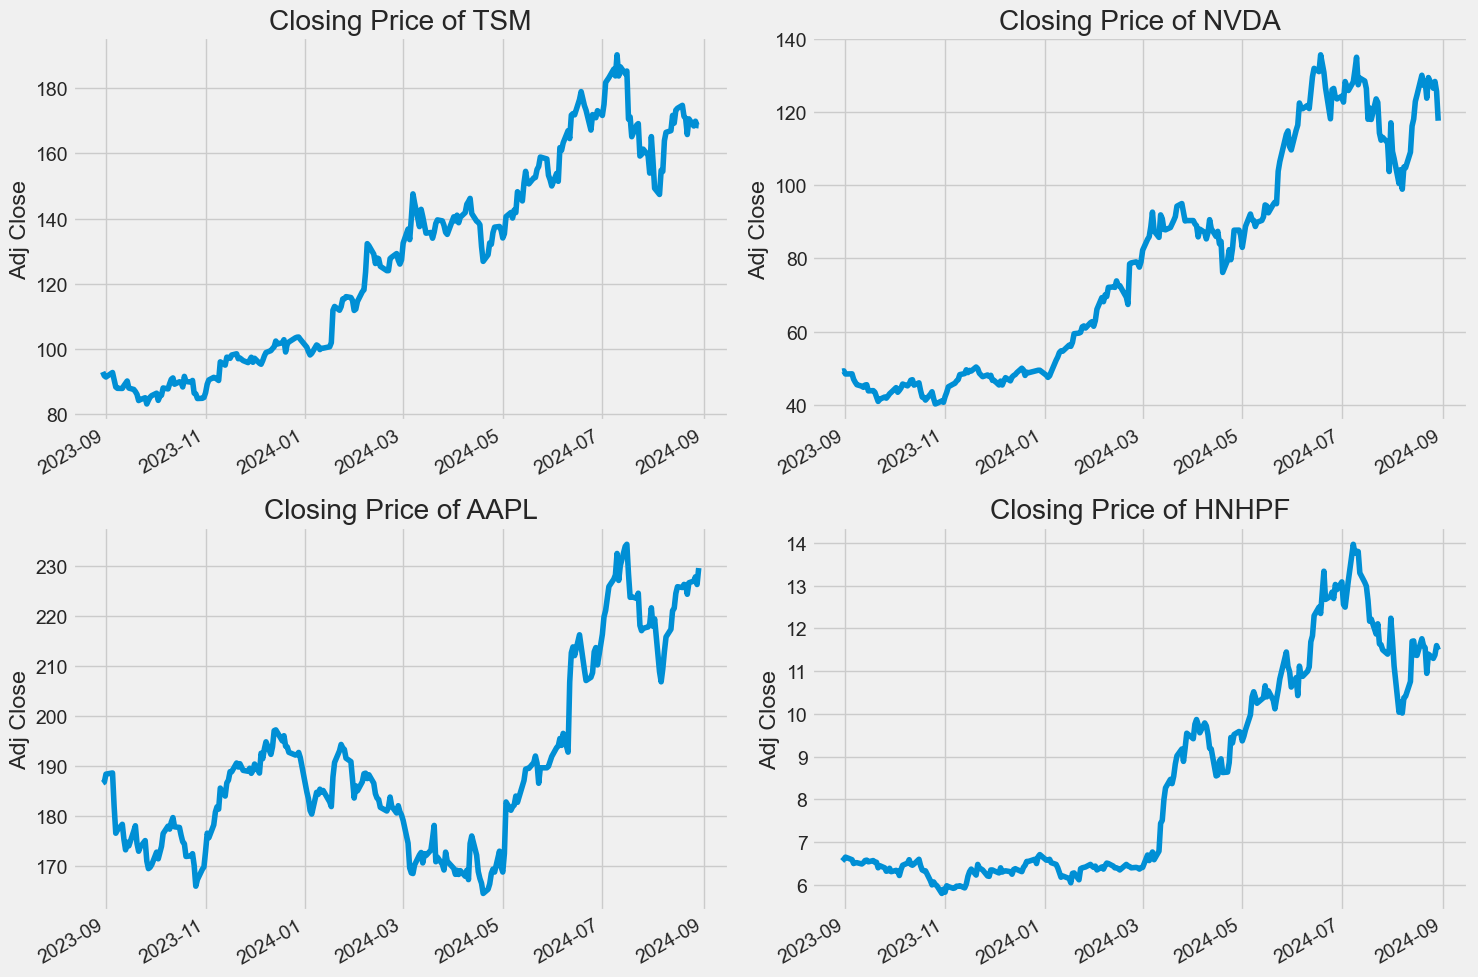

In [10]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    #i是索引值，company是回傳值
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

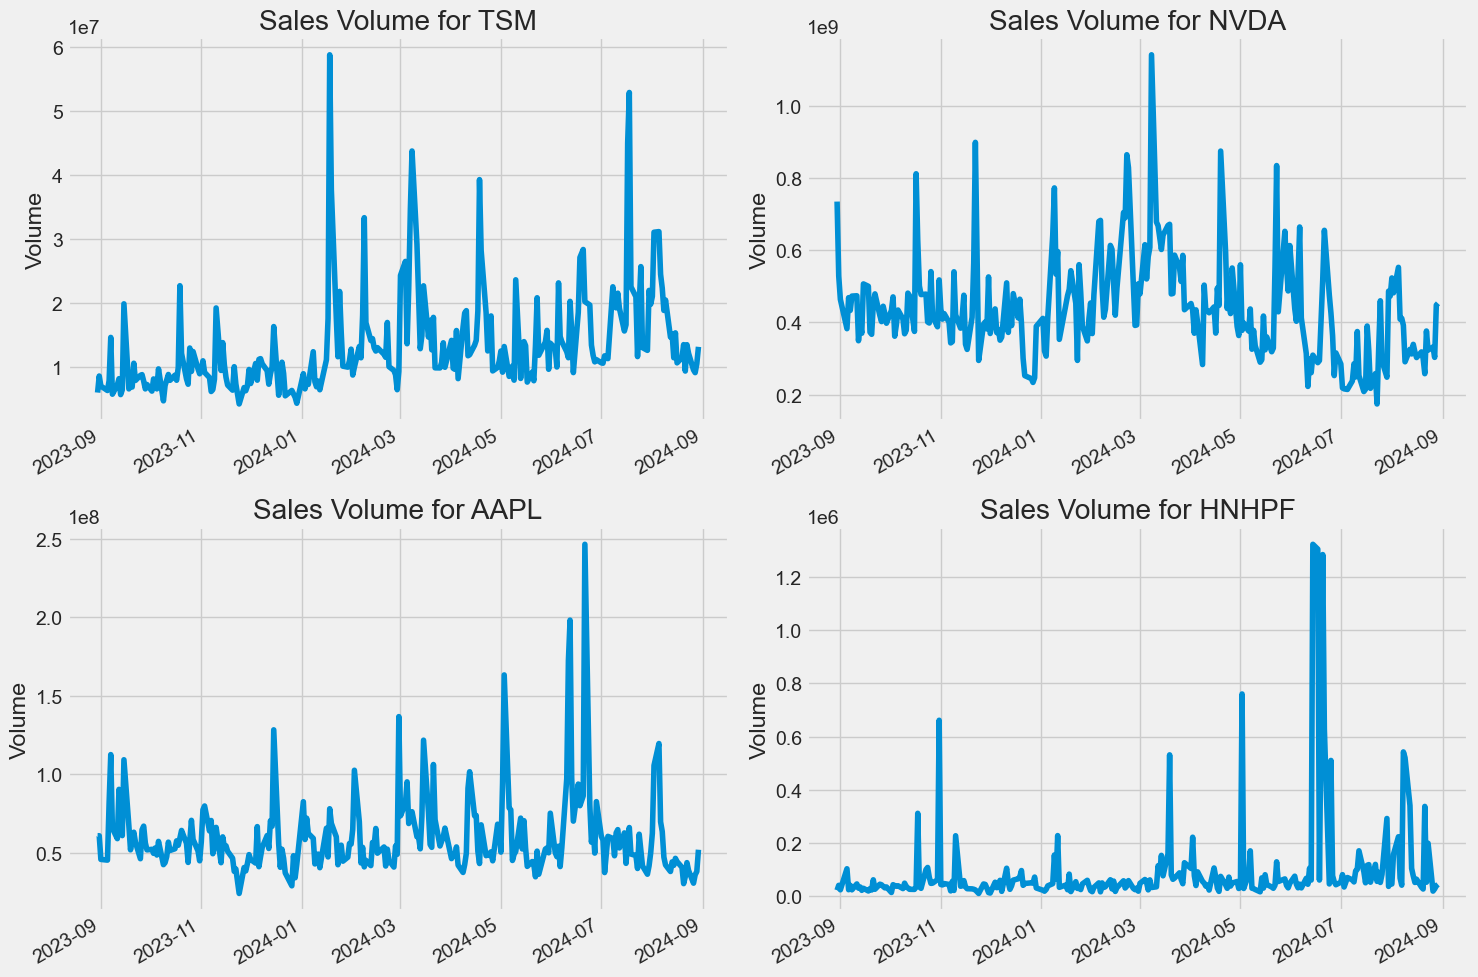

In [11]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i) #創建子圖並指定位置
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [12]:
company

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Date,,,,,,,
2023-08-30,6.56,6.56,6.61,6.56,6.60,20900,HONHAI
2023-08-31,6.60,6.60,6.65,6.48,6.65,39400,HONHAI
2023-09-01,6.65,6.65,6.72,6.60,6.72,22600,HONHAI
2023-09-05,6.59,6.59,6.68,6.55,6.58,101900,HONHAI
2023-09-06,6.50,6.50,6.62,6.50,6.50,22900,HONHAI
...,...,...,...,...,...,...,...
2024-08-23,11.40,11.40,11.62,11.00,11.18,197800,HONHAI
2024-08-26,11.30,11.30,11.52,11.17,11.52,17700,HONHAI
2024-08-27,11.38,11.38,11.44,10.80,10.80,26100,HONHAI


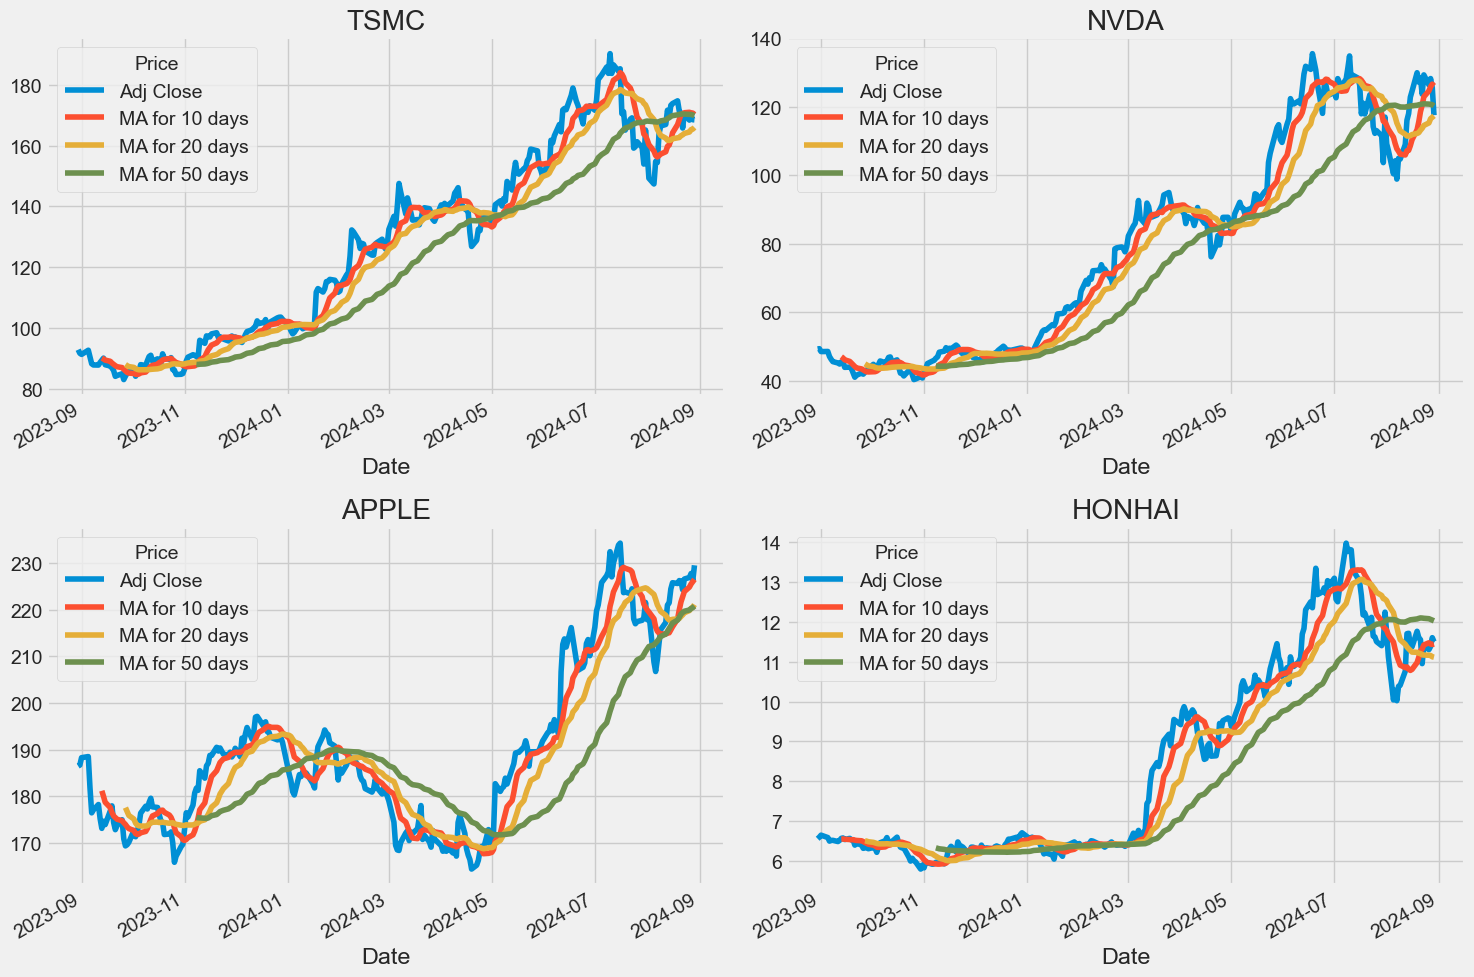

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean() #rolling創建移動窗口，ma是窗口大小

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TSMC')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NVDA')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('APPLE')

HNHPF[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('HONHAI')

fig.tight_layout()

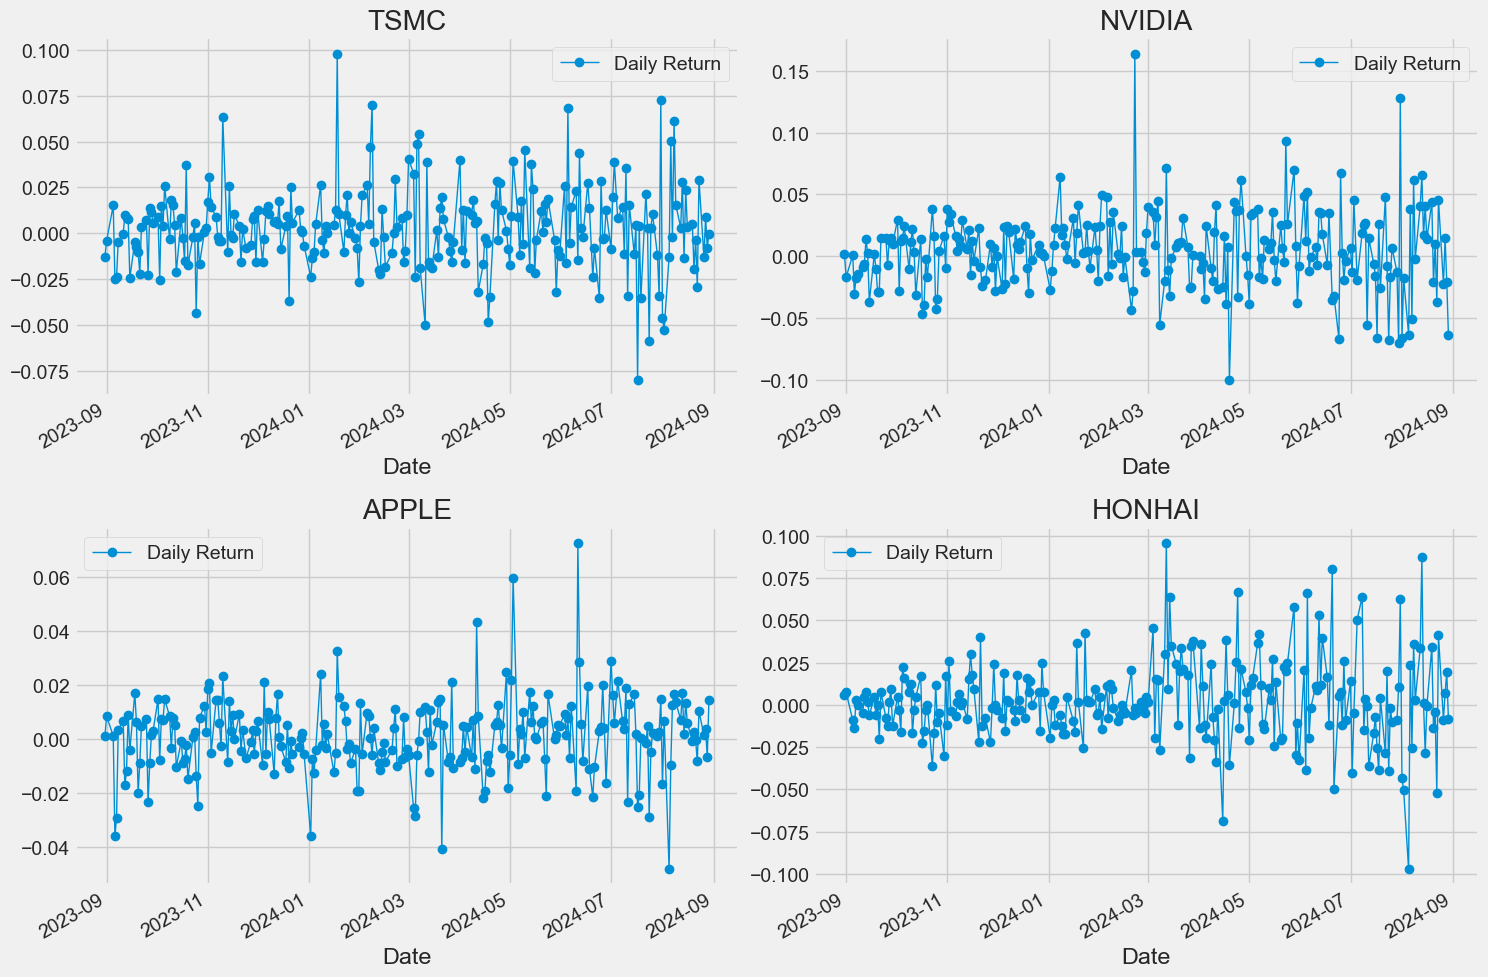

In [15]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o',lw=1)
axes[0,0].set_title('TSMC')#legend圖例，linestyle='-'，marker='*'星星s方形D菱形，

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o',lw=1)
axes[0,1].set_title('NVIDIA')

AAPL['Daily Return'].plot(ax=axes[1,0], legend=True,linestyle='-', marker='o',lw=1)
axes[1,0].set_title('APPLE')

HNHPF['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o',lw=1)
axes[1,1].set_title('HONHAI')

fig.tight_layout()

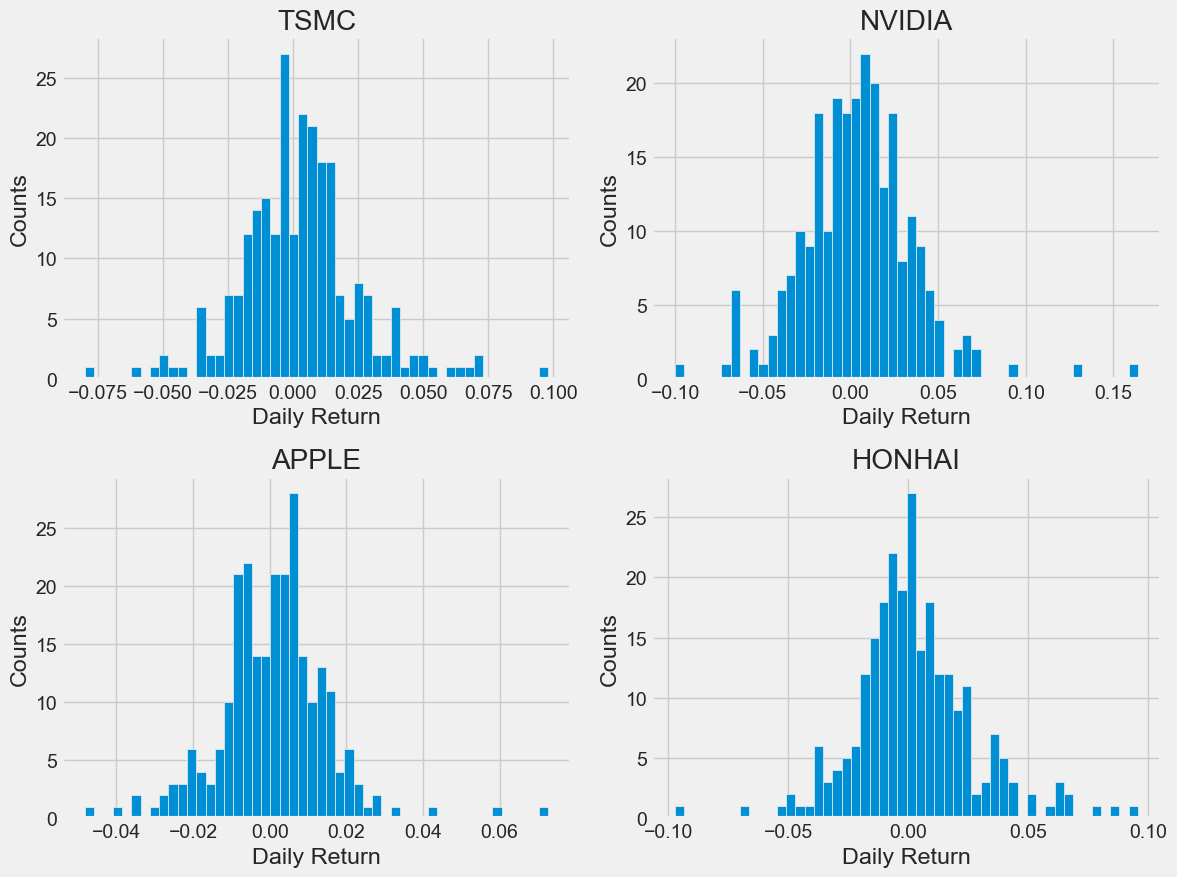

In [16]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [17]:
print('company_name' in company.columns)
print('Adj Close' in company.columns)

# 確認 index 是否正確
print(company.index)

True
True
DatetimeIndex(['2023-08-30', '2023-08-31', '2023-09-01', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-11',
               '2023-09-12', '2023-09-13',
               ...
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


In [18]:
# 方法 1: 檢查 'Company' 欄位是否有 NaN 值
null_num= company['Adj Close'].isnull().sum()  # 返回布林值 Series

# 顯示哪些行有 NaN
print(null_num)

0


In [20]:
df

Price,Adj Close,Close,High,Low,Open,Volume,company_name
Date,,,,,,,
2023-08-30,92.832199,94.779999,95.919998,94.629997,95.449997,6073400,TSMC
2023-08-31,91.647072,93.570000,94.400002,93.269997,93.339996,8661200,TSMC
2023-09-01,91.274879,93.190002,94.580002,93.089996,94.300003,7089900,TSMC
2023-09-05,92.655891,94.599998,95.050003,92.870003,93.400002,6396500,TSMC
2023-09-06,90.363983,92.260002,93.959999,91.589996,93.849998,7933700,TSMC
...,...,...,...,...,...,...,...
2024-08-23,11.400000,11.400000,11.620000,11.000000,11.180000,197800,HONHAI
2024-08-26,11.300000,11.300000,11.520000,11.170000,11.520000,17700,HONHAI
2024-08-27,11.380000,11.380000,11.440000,10.800000,10.800000,26100,HONHAI


In [26]:
df_reset = df.reset_index()
df_reset

Price,Date,Adj Close,Close,High,Low,Open,Volume,company_name
0,2023-08-30,92.832199,94.779999,95.919998,94.629997,95.449997,6073400,TSMC
1,2023-08-31,91.647072,93.570000,94.400002,93.269997,93.339996,8661200,TSMC
2,2023-09-01,91.274879,93.190002,94.580002,93.089996,94.300003,7089900,TSMC
3,2023-09-05,92.655891,94.599998,95.050003,92.870003,93.400002,6396500,TSMC
4,2023-09-06,90.363983,92.260002,93.959999,91.589996,93.849998,7933700,TSMC
...,...,...,...,...,...,...,...,...
1003,2024-08-23,11.400000,11.400000,11.620000,11.000000,11.180000,197800,HONHAI
1004,2024-08-26,11.300000,11.300000,11.520000,11.170000,11.520000,17700,HONHAI
1005,2024-08-27,11.380000,11.380000,11.440000,10.800000,10.800000,26100,HONHAI
1006,2024-08-28,11.600000,11.600000,11.660000,11.450000,11.460000,37800,HONHAI


In [27]:
# 使用 pivot 將公司名稱轉換為欄位
df_pivot =df_reset.pivot(index='Date', columns='company_name', values='Adj Close')

df_pivot

company_name,APPLE,HONHAI,NVIDIA,TSMC
Date,,,,
2023-08-30,186.489487,6.56,49.245041,92.832199
2023-08-31,186.708115,6.60,49.336006,91.647072
2023-09-01,188.288315,6.65,48.490337,91.274879
2023-09-05,188.526825,6.59,48.529320,92.655891
2023-09-06,181.778809,6.50,47.046764,90.363983
...,...,...,...,...
2024-08-23,226.590698,11.40,129.358932,170.650146
2024-08-26,226.930328,11.30,126.449181,168.448273
2024-08-27,227.779388,11.38,128.289032,169.922821


In [29]:
tech_rets = df_pivot.pct_change()
tech_rets.head()

company_name,APPLE,HONHAI,NVIDIA,TSMC
Date,,,,
2023-08-30,NaN,NaN,NaN,NaN
2023-08-31,0.001172,0.006098,0.001847,-0.012766
2023-09-01,0.008463,0.007576,-0.017141,-0.004061
2023-09-05,0.001267,-0.009023,0.000804,0.015130
2023-09-06,-0.035793,-0.013657,-0.030550,-0.024736


#分析股票之間的相關性

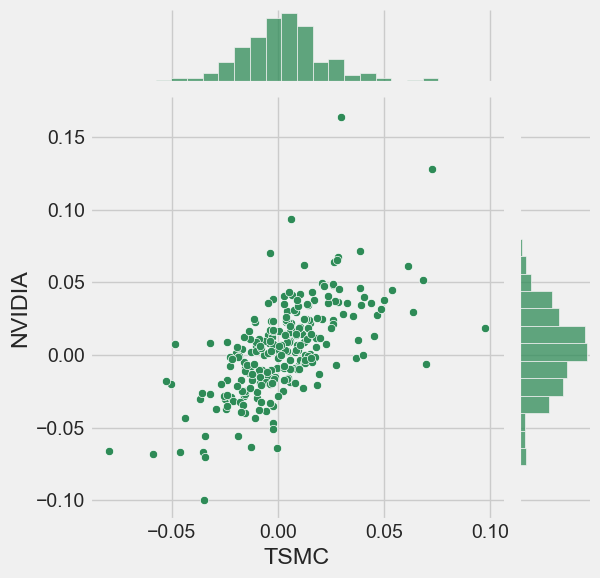

In [30]:
sns.jointplot(x='TSMC', y='NVIDIA', data=tech_rets, kind='scatter', color='seagreen')

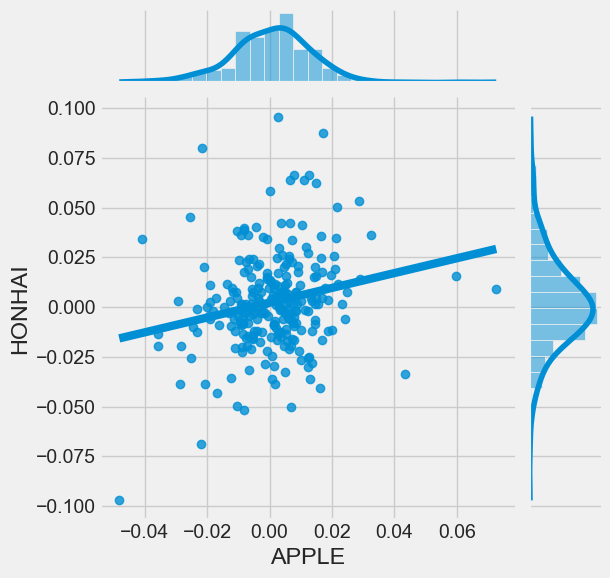

In [32]:
sns.jointplot(x='APPLE', y='HONHAI', data=tech_rets, kind='reg',ci=None)

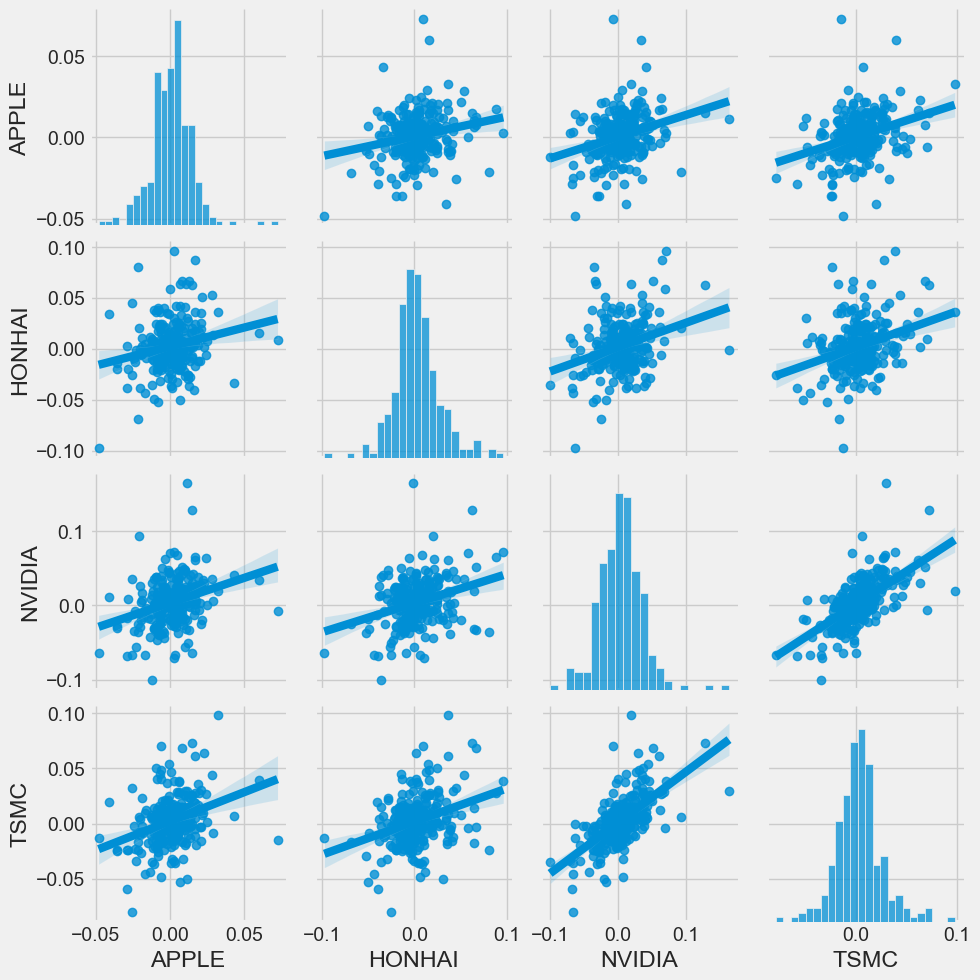

In [33]:
sns.pairplot(tech_rets, kind='reg')

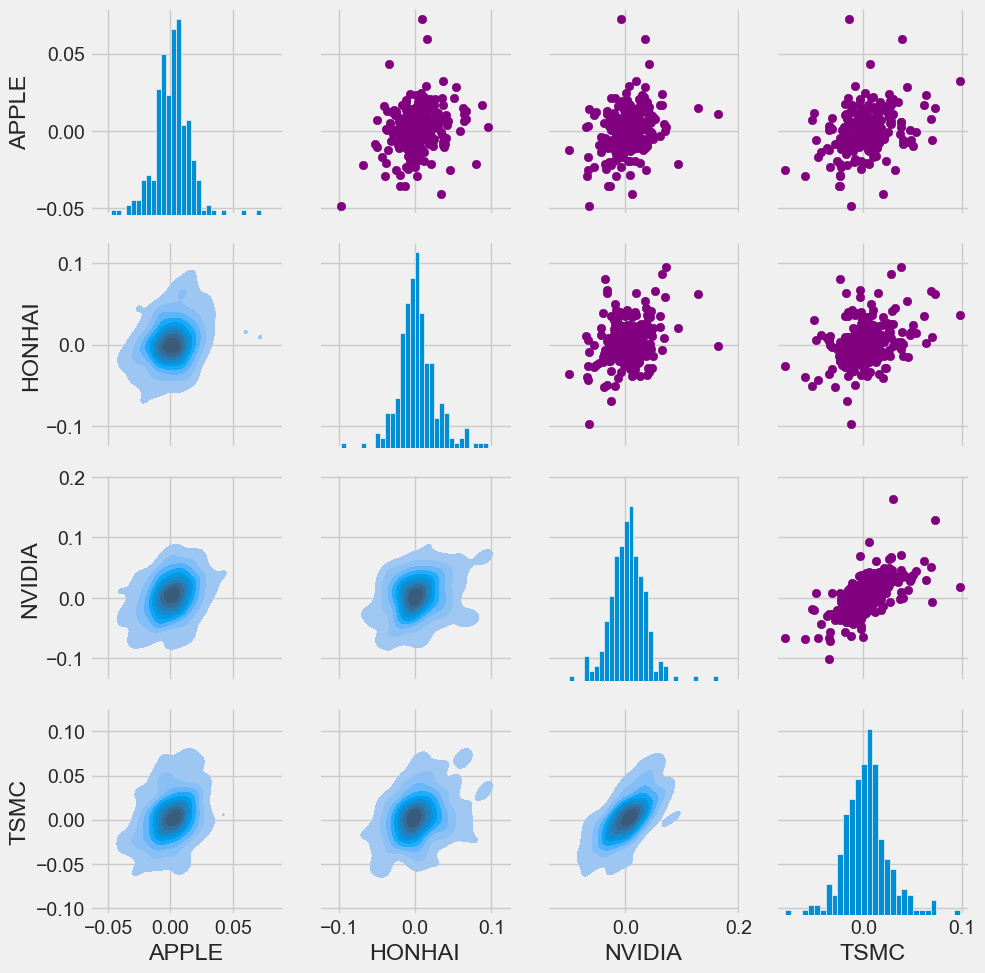

In [54]:
return_fig = sns.PairGrid(tech_rets.dropna())#只創建，不畫圖

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot,fill=True)
                    

return_fig.map_diag(plt.hist, bins=30)

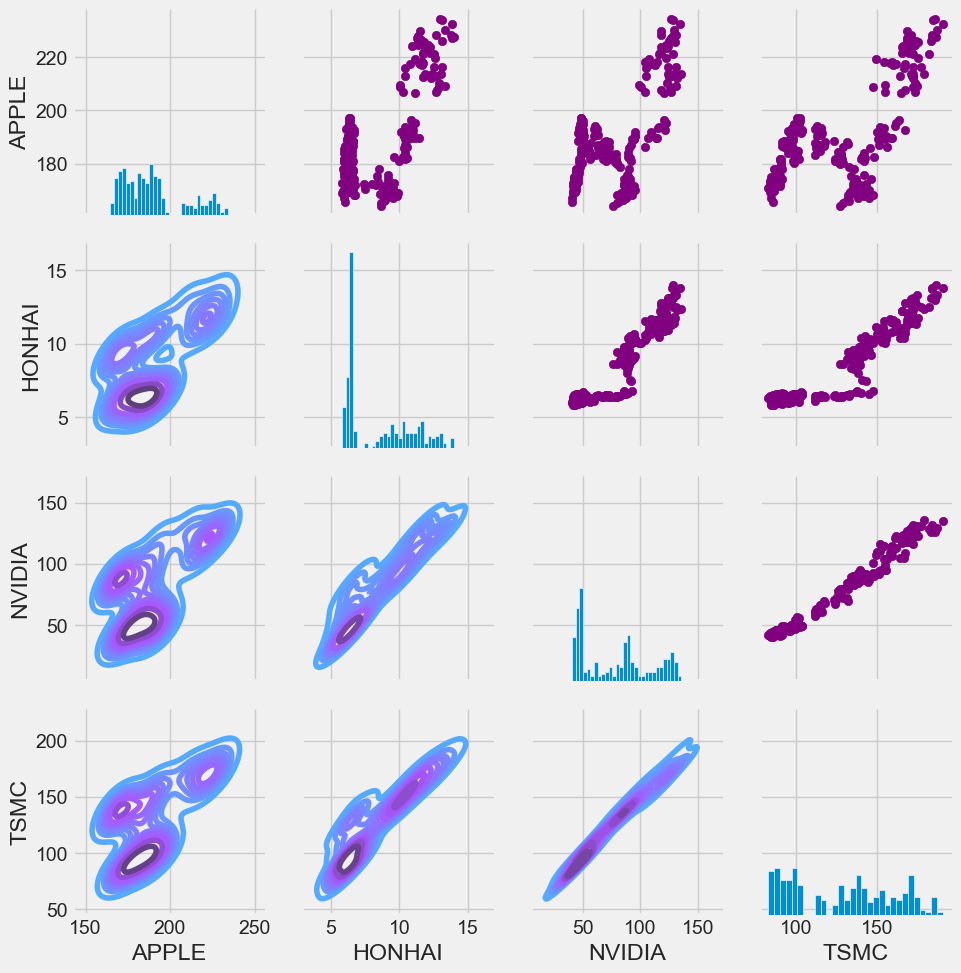

In [37]:
return_fig = sns.PairGrid(df_pivot)#只創建，不畫圖

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

In [38]:
return_fig

NameError: name 'closing_df' is not defined

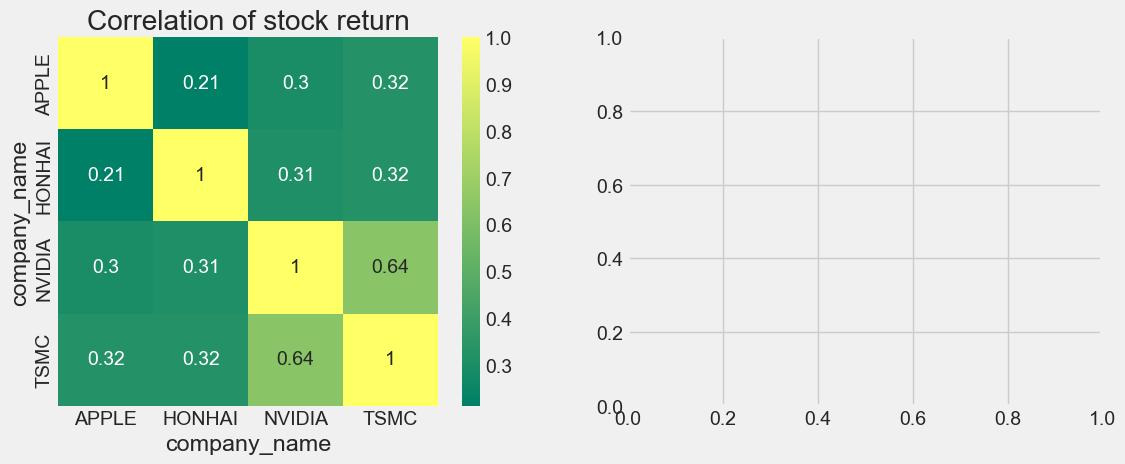

In [39]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

#分析股票之間的風險和報酬

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)#10年前的同一天


for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

In [ ]:
NVDA

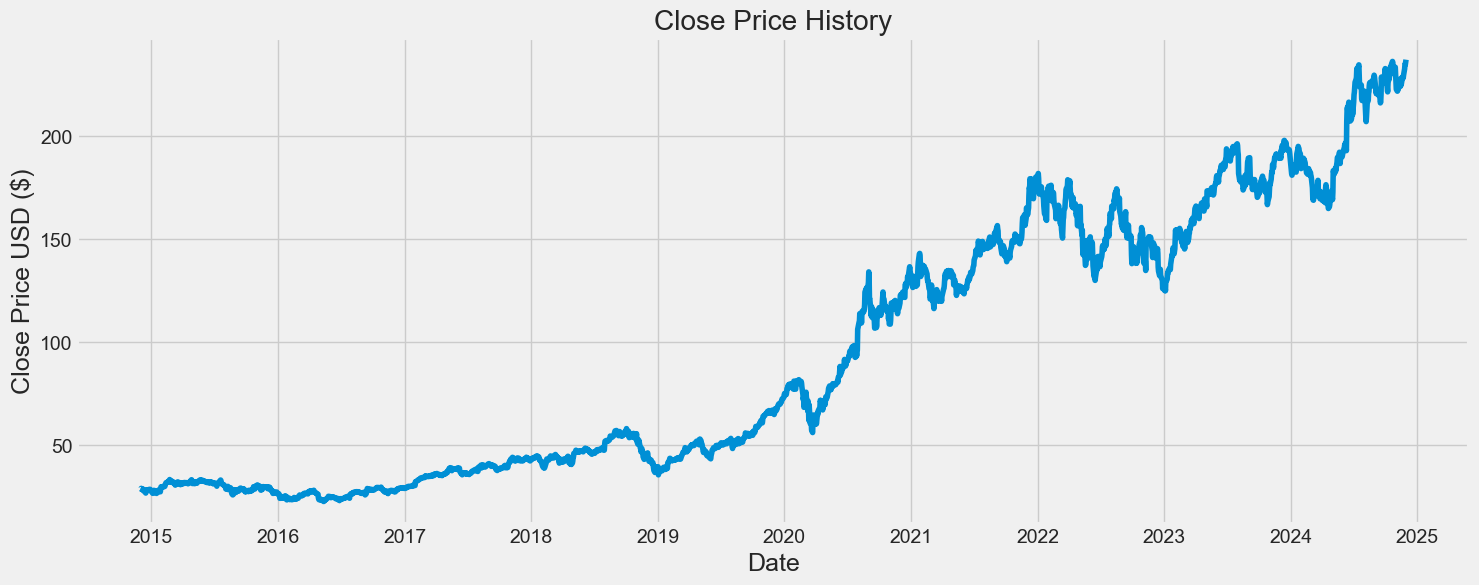

In [63]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
NVDA.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object', name='Price')

In [41]:
NVDA.columns=NVDA.columns.get_level_values(0) #刪掉Ticker

In [42]:
data=AAPL.filter(['Close'])
dataset=data.values
training_data_len=int(np.ceil(len(dataset)*.9)) #np.ceil()向上取整
training_data_len

227

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) #先擬合數據，找到數據的平均、標準差，再把它標準化

scaled_data

array([[0.32440549],
       [0.32755647],
       [0.35032948],
       [0.35376675],
       [0.25651678],
       [0.17989109],
       [0.188771  ],
       [0.20567171],
       [0.16184477],
       [0.13191071],
       [0.15382418],
       [0.14336857],
       [0.18576339],
       [0.20151827],
       [0.15024355],
       [0.1279002 ],
       [0.14021759],
       [0.15869379],
       [0.09968499],
       [0.0777713 ],
       [0.0814953 ],
       [0.08894308],
       [0.12532224],
       [0.10598672],
       [0.12403327],
       [0.14193645],
       [0.17888863],
       [0.20037244],
       [0.19177883],
       [0.21197367],
       [0.22500723],
       [0.1983673 ],
       [0.1965053 ],
       [0.1740188 ],
       [0.1552563 ],
       [0.14981389],
       [0.1128617 ],
       [0.11458034],
       [0.12088229],
       [0.08736759],
       [0.0270696 ],
       [0.0461186 ],
       [0.07576615],
       [0.08264113],
       [0.12847322],
       [0.18003446],
       [0.16685753],
       [0.203

In [45]:
train_data = scaled_data[0:int(training_data_len), :]#取前n列的數據當訓練數據

In [46]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #過去60天的資訊
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#reshape(要被重塑的數據,重塑後的形狀),重塑後的形狀是(樣本數,時間步數,特徵維度)

[array([0.32440549, 0.32755647, 0.35032948, 0.35376675, 0.25651678,
       0.17989109, 0.188771  , 0.20567171, 0.16184477, 0.13191071,
       0.15382418, 0.14336857, 0.18576339, 0.20151827, 0.15024355,
       0.1279002 , 0.14021759, 0.15869379, 0.09968499, 0.0777713 ,
       0.0814953 , 0.08894308, 0.12532224, 0.10598672, 0.12403327,
       0.14193645, 0.17888863, 0.20037244, 0.19177883, 0.21197367,
       0.22500723, 0.1983673 , 0.1965053 , 0.1740188 , 0.1552563 ,
       0.14981389, 0.1128617 , 0.11458034, 0.12088229, 0.08736759,
       0.0270696 , 0.0461186 , 0.07576615, 0.08264113, 0.12847322,
       0.18003446, 0.16685753, 0.20380971, 0.24090526, 0.25623027,
       0.24935551, 0.30650232, 0.28358638, 0.32139788, 0.32956162,
       0.35391011, 0.3536236 , 0.3788312 , 0.36722997, 0.37682605])]
[0.35763389575070503]

[array([0.32440549, 0.32755647, 0.35032948, 0.35376675, 0.25651678,
       0.17989109, 0.188771  , 0.20567171, 0.16184477, 0.13191071,
       0.15382418, 0.14336857, 0.18

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM 
#LSTM長短型記憶模型(RNN的一種),遺忘門、輸入門、輸出門
#Dense沒有時間依賴性，處理靜態數據

model = Sequential() #序列式模型，一層一層添加
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1))) 
#return sequential=True，傳回全部時間點的值; False,只傳回最後一個hidden state
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))#激活函數默認為線性
model.add(Dense(1)) #輸出層

model.compile(optimizer='adam', loss='mean_squared_error')#均方誤差越小越好，誤差平方和取平均

model.fit(x_train, y_train, batch_size=1, epochs=1)#epoch輪次，太多會造成overfitting

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0497


In [48]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#把標準化過的數據轉回原本的範圍

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


8.913219899335063

C:\Users\user\AppData\Local\Temp\ipykernel_5924\2635661700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


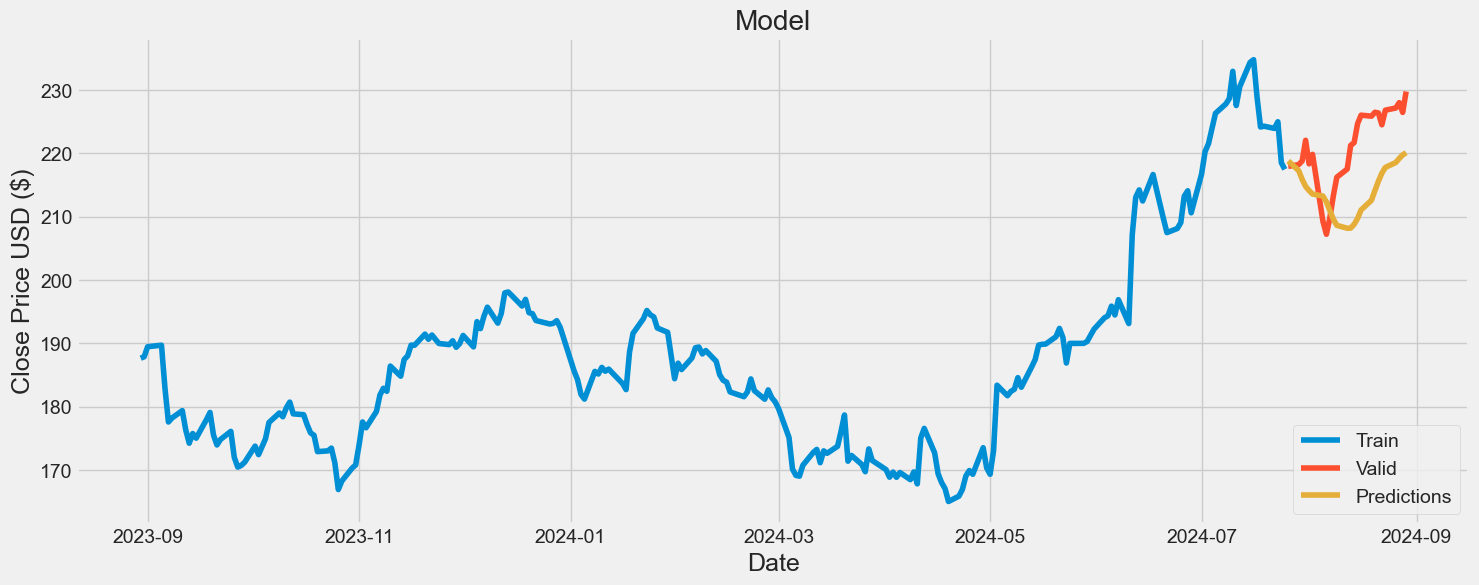

In [55]:
train = data[:training_data_len]#data是股票的Close數據
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [50]:
valid

,Close,Predictions
Date,,
2024-07-26,217.960007,218.810059
2024-07-29,218.240005,217.288101
2024-07-30,218.800003,215.912033
2024-07-31,222.080002,214.782166
2024-08-01,218.360001,214.140762
2024-08-02,219.860001,213.590759
2024-08-05,209.270004,213.263779
2024-08-06,207.229996,212.334076
2024-08-07,209.820007,210.967453
